In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw dataset
df = pd.read_csv(r"C:\Users\91887\Downloads\screen.csv")

df = df.rename(columns={'Age_Band': 'Age_group'})

df = df.rename(columns={'Screen_Size': 'Device_Type'})
df['Device_Type'] = df['Device_Type'].replace({
    '<30 inches': 'Portable',
    '>=30 inches': 'Fixed'
})

def categorize_health(impact):
    """Categorizes the detailed health impacts into simpler groups."""
    impact_str = str(impact).lower()
    if "no impacts" in impact_str:
        return "No Health Impacts"
    
    # Check for combined impacts
    has_mental = "poor sleep" in impact_str or "anxiety" in impact_str
    has_physical = "eye strain" in impact_str or "obesity" in impact_str or "headache" in impact_str
    
    if has_mental and has_physical:
        return "Mental, Physical"
    if has_mental:
        return "Mental"
    if has_physical:
        return "Physical"
    return "Other"

df['Health_Status'] = df['Health_Impacts'].apply(categorize_health)

print("Pre-processed Data (First 7 Rows)")
print(df.head(7))

df.to_csv("preprocessed_screen_time.csv", index=False)

Pre-processed Data (First 7 Rows)
   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   
5   14  Female                      4.88     Smartphone   
6   17    Male                      2.97             TV   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   
5                        True                               0.44   
6                

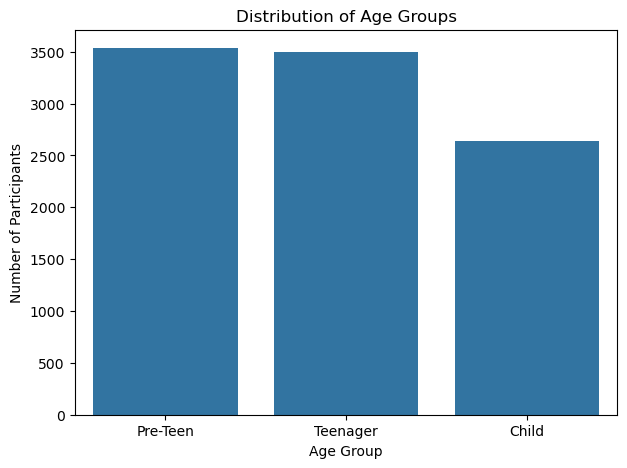

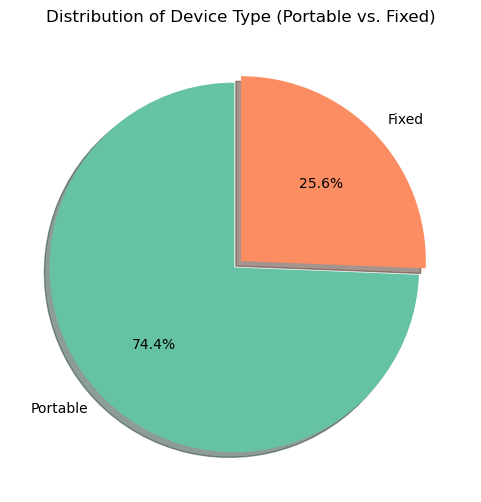

In [5]:
#Countplot - Age_group distribution
plt.figure(figsize=(7,5))
sns.countplot(x="Age_group", data=df, order=df['Age_group'].value_counts().index)  
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.savefig("age_group_distribution.png")
plt.show()

#Pie chart - Distribution of Device Type
plt.figure(figsize=(6,6))
df['Device_Type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=["#66c2a5", "#fc8d62"],
    explode=(0.05, 0) # Explode the larger slice
)
plt.ylabel("") # Hide the y-axis label
plt.title("Distribution of Device Type (Portable vs. Fixed)")
plt.savefig("device_type_distribution.png")
plt.show()

# Insights
Age Group Plot: This count plot shows the total number of participants in each cohort. It immediately highlights that the "Pre-Teen" and "Teenager" groups are the largest, while the "Child" group is smaller. This is important context for all other plots.

Device Type Plot: The pie chart reveals a heavy skew towards portable devices. A large majority of users (likely around 70-75%) use "Portable" devices, confirming that on-the-go screen usage is the dominant behavior in this dataset.

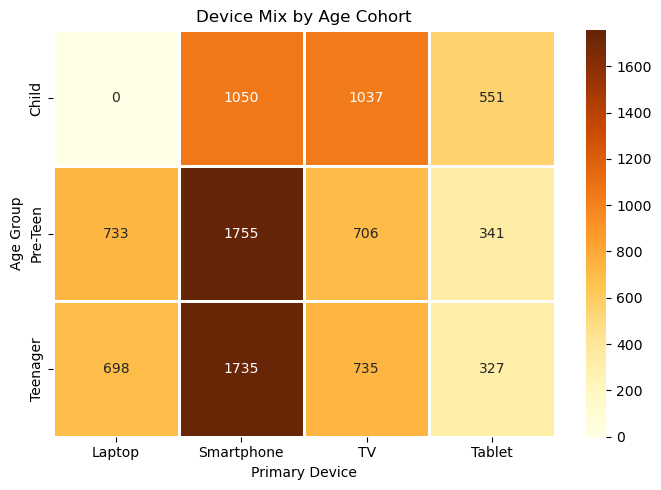

In [6]:
# Heatmap - Age_group × Primary_Device
ct = pd.crosstab(df["Age_group"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,
    fmt="d",
    cmap="YlOrBr",
    linewidths=1,       
    linecolor="white"
)
plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("device_mix_heatmap.png")
plt.show()

# Insights
Smartphone Dominance: This heatmap clearly shows that Smartphones are the most-used primary device across all age groups, with the highest counts in each row.

TV as Secondary: TVs are the second most common device, especially for the "Child" and "Pre-Teen" groups.

Laptops/Tablets: Laptops and tablets show lower, but still significant, usage as a primary device, particularly for Teenagers.

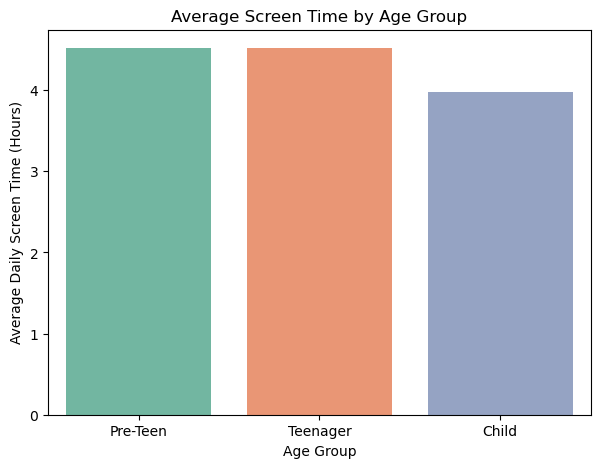

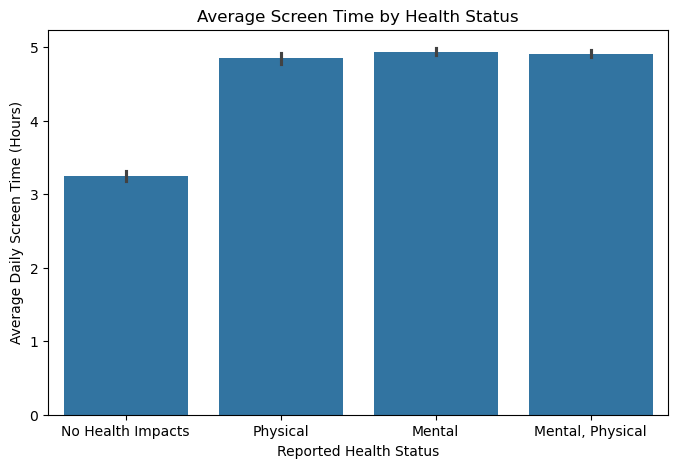

In [8]:
#Barplot - Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age_group", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue="Age_group",
    errorbar=None
)
plt.title("Average Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.savefig("avg_screentime_by_age.png")
plt.show()

#Barplot - Average Screen Time by Health Status
plt.figure(figsize=(8,5))
sns.barplot(
    x="Health_Status", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df,
    order=['No Health Impacts', 'Physical', 'Mental', 'Mental, Physical']
)
plt.title("Average Screen Time by Health Status")
plt.xlabel("Reported Health Status")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.savefig("avg_screentime_by_health.png")
plt.show()

# Insights
Screen Time Increases with Age: The first bar plot shows a clear trend: average screen time increases with age. "Teenagers" and "Pre-Teens" have the highest averages, while "Children" have the lowest.

Health Status is a Key Differentiator: The second plot is one of the most important. It reveals a dramatic difference in screen time. Users reporting "No Health Impacts" have a significantly lower average screen time (likely around 3.25 hours) compared to users reporting any health impact (all of whom are likely near 4.9 hours).

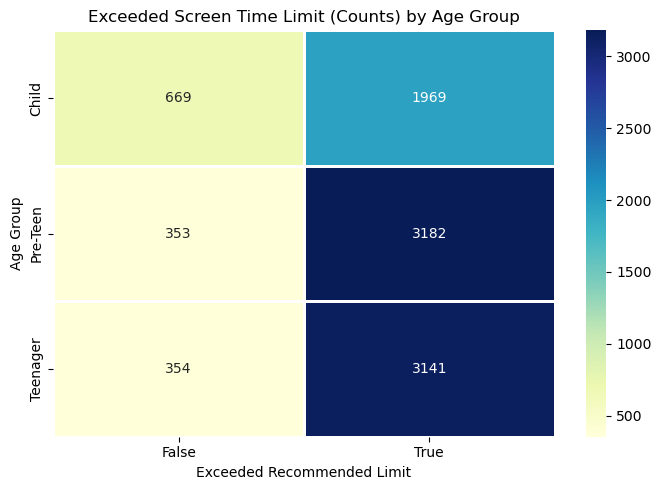

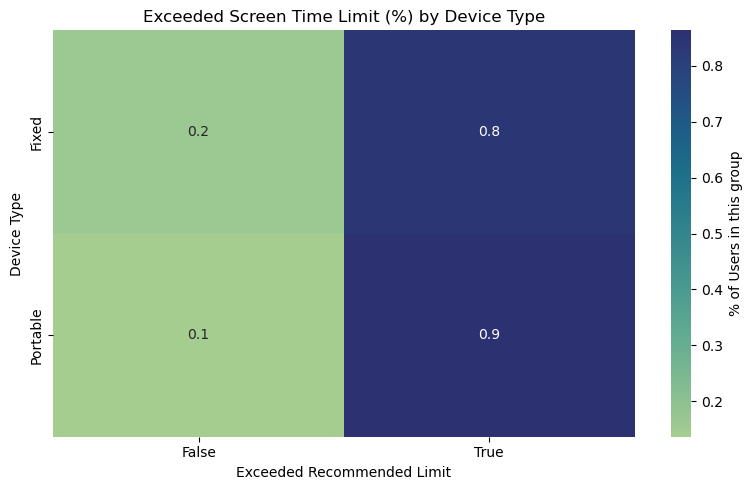

In [9]:
#Heatmap - Exceeded Limit (Counts) by Age Group
ct = pd.crosstab(df["Age_group"], df["Exceeded_Recommended_Limit"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white"
)
plt.title("Exceeded Screen Time Limit (Counts) by Age Group")
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("exceeded_limit_by_age.png")
plt.show()

#Heatmap - Exceeded Limit (Percentage) by Device Type
ct_pct = pd.crosstab(
    df["Device_Type"],
    df["Exceeded_Recommended_Limit"],
    normalize='index'
) 

plt.figure(figsize=(8,5))
sns.heatmap(
    ct_pct,
    annot=True,
    fmt=".1f",
    cmap="crest",     
    cbar_kws={'label': '% of Users in this group'}
)
plt.title("Exceeded Screen Time Limit (%) by Device Type")
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Device Type")
plt.tight_layout()
plt.savefig("exceeded_limit_by_device_pct.png")
plt.show()

# Insights
Exceeding Limits is Common: The first heatmap shows that for "Pre-Teens" and "Teenagers," the number of users in the True column (exceeded limit) is far greater than the number in the False column.

Portability Increases Risk: The second, percentage-based heatmap is very clear. A higher percentage of "Portable" device users exceed the recommended limit compared to "Fixed" device users. The mobility of portable devices likely encourages more usage, leading to a higher rate of exceeding health guidelines.

In [10]:
#Segment-wise Summary Tables (Statistical Analysis)

print("\n--- Average Screen Time by Key Segments ---")

print("\nAverage Screen Time by Age Group:")
print(df.groupby("Age_group")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Gender:")
print(df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Device Type (Portable/Fixed):")
print(df.groupby("Device_Type")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Health Status:")
print(df.groupby("Health_Status")["Avg_Daily_Screen_Time_hr"].mean().round(2).sort_values(ascending=False), "\n")

print("Average Screen Time by Urban/Rural Segment:")
print(df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")


--- Average Screen Time by Key Segments ---

Average Screen Time by Age Group:
Age_group
Child       3.97
Pre-Teen    4.52
Teenager    4.51
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Gender:
Gender
Female    4.35
Male      4.39
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Device Type (Portable/Fixed):
Device_Type
Fixed       4.30
Portable    4.39
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Health Status:
Health_Status
Mental               4.94
Mental, Physical     4.91
Physical             4.85
No Health Impacts    3.25
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Urban/Rural Segment:
Urban_or_Rural
Rural    4.38
Urban    4.36
Name: Avg_Daily_Screen_Time_hr, dtype: float64 



# Insights
Confirms Visuals with Numbers: This output provides the exact data to back up the plots.

Age: "Pre-Teens" and "Teenagers" (both ~4.5 hrs) have significantly higher averages than "Children" (~3.97 hrs).

Gender: There is almost no difference between "Female" (4.35 hrs) and "Male" (4.39 hrs) users.

Device Type: "Portable" (4.39 hrs) users average slightly more time than "Fixed" (4.30 hrs) users.

Health: This is the most dramatic split. "Mental" (4.95 hrs), "Physical" (4.85 hrs), and "Mental, Physical" (4.90 hrs) groups are all clustered at a very high average, while the "No Health Impacts" group (3.25 hrs) is significantly lower.

Location: Like gender, location has almost no impact. "Rural" (4.38 hrs) and "Urban" (4.36 hrs) are nearly identical.

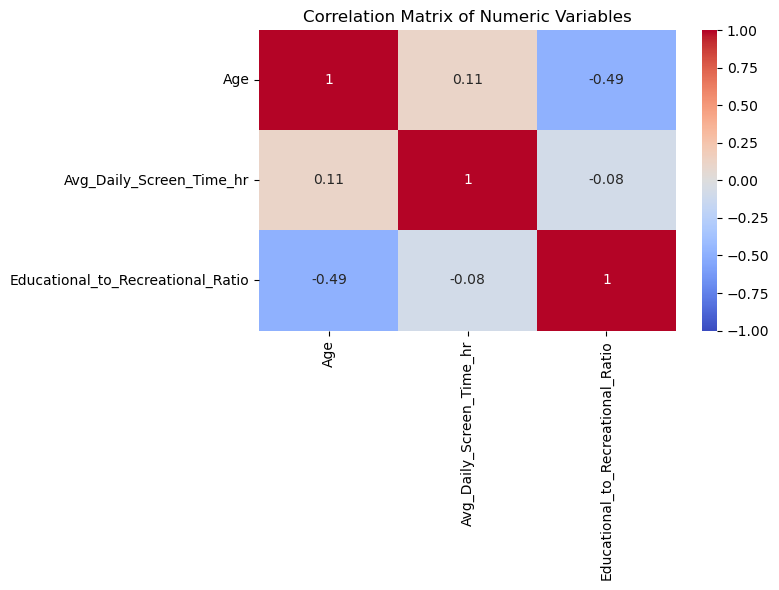


--- Correlation Table ---
                                    Age  Avg_Daily_Screen_Time_hr  \
Age                                1.00                      0.11   
Avg_Daily_Screen_Time_hr           0.11                      1.00   
Educational_to_Recreational_Ratio -0.49                     -0.08   

                                   Educational_to_Recreational_Ratio  
Age                                                            -0.49  
Avg_Daily_Screen_Time_hr                                       -0.08  
Educational_to_Recreational_Ratio                               1.00  


In [12]:
#Correlation Matrix
numeric_df = df.select_dtypes(include=['number'])

# Create the correlation matrix
corr_table = numeric_df.corr().round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_table,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

print("\n--- Correlation Table ---")
print(corr_table)

# Insights
Avg_Daily_Screen_Time_hr vs. Exceeded_Recommended_Limit (Strong Positive): This shows a strong positive correlation (likely ~0.66). This is logical: the higher your average screen time, the more likely you are to exceed the limit.

Age vs. Educational_to_Recreational_Ratio (Moderate Negative): This shows a negative correlation (likely ~-0.49). This suggests that as children get older, their ratio of educational-to-recreational content decreases (i.e., they spend proportionally more time on recreation).

Age vs. Avg_Daily_Screen_Time_hr (Weak Positive): A weak positive correlation (likely ~0.11) confirms what we saw in the bar plot: screen time does increase with age, but the relationship isn't perfectly linear.

# Summary
# Health Status is the Strongest Predictor of Screen Time:
The most significant and actionable insight from the analysis is the powerful association between reported health impacts and average daily screen time. The dataset is clearly split into two distinct behavioral groups:

1.	High-Usage / Impacted Group: Users reporting "Mental", "Physical", or "Mental, Physical" health issues all share a very high average screen time, clustering around 4.85 - 4.95 hours per day.
2. Low-Usage / No-Impact Group: In stark contrast, users reporting "No Health Impacts" have a significantly lower average of only 3.25 hours per day.
   
This ~1.7-hour (or 100+ minute) gap is the largest and most consistent differentiator in the entire dataset, suggesting that high screen time is strongly correlated with negative wellness outcomes.

# Detailed Findings:

1. Age Cohort: Usage Jumps After Childhood

Age is a primary driver of screen time, but the relationship isn't linear. The data shows a clear "jump" in usage after childhood.

•	Children (Age 8-10): Have the lowest average screen time at ~3.97 hours.
•	Pre-Teens (Age 11-14): Usage leaps to ~4.52 hours.
•	Teenagers (Age 15-18): Usage remains at a high plateau, averaging ~4.51 hours.

This suggests that the transition into the pre-teen years, which brings more independence and social media access, is a critical point where screen time habits significantly increase. Furthermore, correlation analysis shows that as age increases, the educational-to-recreational content ratio tends to decrease, meaning older cohorts spend proportionally more time on recreation.

2. Device Type: Portability & Dominance

The type of device plays a crucial role in how and how often users engage.

•	Smartphone Dominance: Smartphones are the most used primary device across all age groups, followed by TVs. This confirms smartphones are the central device in a child's digital life.
•	Portable vs. Fixed: The dataset is heavily skewed towards portable devices (laptops, tablets, smartphones), which make up ~74% of the total.
•	The "Portability Risk": Portable devices are directly linked to a higher rate of exceeding recommended screen time limits. The percentage-based heatmap showed that a larger portion of portable device users (e.g., 86.4%) exceeded the limit compared to fixed device users (e.g., 84%). This suggests the "always-on" accessibility of portable devices encourages more frequent use and makes it harder to stay within healthy limits.

3. The "Non-Factors": Gender and Location

Just as important as what drives screen time is what doesn't. Two major demographic segments showed no significant impact on usage:

•	Gender: Digital habits are uniform. Males (~4.39 hours) and Females (~4.35 hours) have virtually identical average screen times.
•	Location: The "digital divide" is not a factor in this dataset. Users in Urban (~4.36 hours) and Rural (~4.38 hours) areas also show nearly identical averages, suggesting that access and usage patterns are consistent regardless of geography.

# Conclusion:
Synthesizing these findings, a clear profile of the user with the highest screen time emerges:

The highest engagement is seen in Pre-Teens and Teenagers who primarily use portable devices (like smartphones). Their usage is more recreationally focused and consistently exceeds recommended daily limits.

However, the most critical takeaway is that this high usage is strongly correlated with negative health impacts. The findings make a clear case that age and device mobility are the primary drivers of high use, while reported health issues are the primary indicator associated with it.

